## Imports

In [23]:
import pandas as pd
import nltk
import matplotlib.pyplot as plt
from matplotlib import rcParams
from nltk import word_tokenize, pos_tag
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer

### Figure 2a

### Figure 2b

### Figure 2c

### Figure 2d

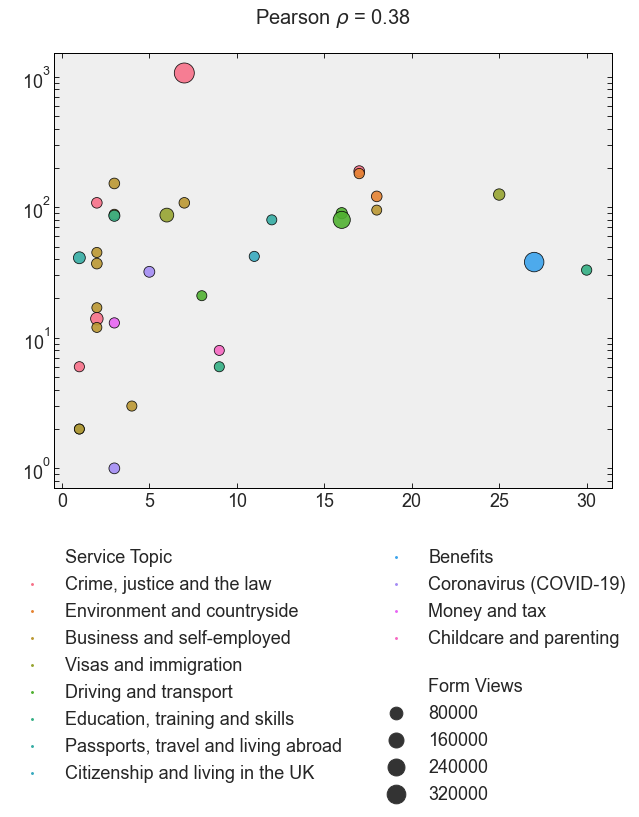

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
from matplotlib import rcParams
import seaborn as sns
import numpy as np

# Load data  
form_count_2022_df = pd.read_excel('../data/processed/202212-govuk-organisations-with-forms-processed.xlsx')
form_views_2022_df = pd.read_excel('../data/processed/202211-form-services-pageviews-processed.xlsx')
services_2023_df = pd.read_excel('../data/processed/202308-services-list-processed.xlsx')

# Rename the 'total' column to 'form_count'
form_count_2022_df = form_count_2022_df.rename(columns={'total': 'form_count'})

# Group by and get the sum of 'form_views'
form_views_2022_df = form_views_2022_df.groupby(
    'organisation')[['views']].sum().reset_index()
form_views_2022_df.rename(columns={'views': 'form_views'}, inplace=True)

# Group by 'organisation', count 'service', and find the most common 'topic'
services_2023_df = services_2023_df.groupby('organisation').agg({
    'service': 'count',
    'topic': lambda x: x.mode().iloc[0] if not x.empty else None
}).reset_index()

# Rename  columns
services_2023_df.columns = ['organisation', 'service_count', 'topic']

# Create a new DataFrame with the selected columns
services_2023_df = services_2023_df[['organisation', 'service_count', 'topic']]

# Merge the two DataFrames on 'organisation'
merged_df = pd.merge(form_count_2022_df, form_views_2022_df, on='organisation')
merged_df = pd.merge(merged_df, services_2023_df, on='organisation', how='inner')

# Compute the Pearson correlation coefficient between 'service_count' and 'form_count'
corr_coefficient, _ = pearsonr(merged_df['service_count'], np.log(merged_df['form_count']))

# Set font to Helvetica
plt.rcParams['font.family'] = 'Helvetica'

# Create a bubble plot with a regression line
plt.figure(figsize=(10, 8))
sns.set_style("whitegrid")  # Remove gridlines

# Plot form_count against services on logarithmic scales, color-coded by 'topic'
g = sns.scatterplot(data=merged_df, x='service_count', y='form_count', size=merged_df['form_views'], sizes=(100, 400), hue=merged_df['topic'], marker='o', palette='husl', alpha=0.9)

# Set y-axis to logarithmic scale
plt.yscale('log')

# Set axis labels and font size
plt.xlabel('', fontsize=18)
plt.ylabel('', fontsize=18)

# Set the face color
plt.gca().set_facecolor('#efefef')

# Remove gridlines
plt.grid(False)

# Add major and minor ticks facing inwards
plt.tick_params(
    axis='both',
    which='both',
    direction='in',
    top=True,
    right=True,
    bottom=True,
    left=True,
    labelsize=18,
    width=1,
    length=5
)

# Set border color to black
g.get_children()[0].set_edgecolor('black')

# Move the legend outside the plot
legend = plt.legend(title='', loc='upper left', fontsize=18, frameon=False, bbox_to_anchor=(-.1, -.1), ncol=2)

# Set marker scale to 3.5 only for 'topic'
for handle in legend.legendHandles:
    if str(handle.get_label()) in merged_df.topic.unique():
        handle._sizes = [3.5] if handle.get_label() in merged_df.topic.unique() else [3.5]

# Add a blank line between 'topic' and 'form_views' in the legend
labels = legend.get_texts()
for label in labels:
    if label.get_text() == 'form_views':
        label.set_text('\nForm Views')

for label in labels:
    if label.get_text() == 'topic':
        label.set_text('Service Topic')

# Set the title to include the Pearson correlation coefficient
plt.title(f'Pearson $ρ$ = {corr_coefficient:.2f}\n', fontsize=20)


# Modify the spines
g.spines['top'].set_color('black')  # Remove top spine
g.spines['right'].set_color('black')  # Remove right spine
g.spines['left'].set_linewidth(1)
g.spines['left'].set_color('black')
g.spines['bottom'].set_linewidth(1)
g.spines['bottom'].set_color('black')
g.spines['right'].set_linewidth(1)
g.spines['top'].set_linewidth(1)

# Save figure
# plt.savefig("../reports/figures/fig2d.png", dpi=300, bbox_inches='tight')

# Show the plot
plt.show()

### Figure 2e1

[nltk_data] Downloading package wordnet to /Users/vstraub/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /Users/vstraub/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
/var/folders/5f/f4nt1g8x77ggbhbbvwpth89c0000gr/T/ipykernel_80278/3820829621.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  verbs_2012_df['verb'] = verbs_2012_df['Service'].apply(extract_first_verb)
/var/folders/5f/f4nt1g8x77ggbhbbvwpth89c0000gr/T/ipykernel_80278/3820829621.py:110: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(top_10_verbs['verb'], fontsize=18)
/var/folders/5f/f4nt1g8x77ggbhbbvwpth89c0000gr/T/ipykernel_80278/3820829621.py:111: UserW

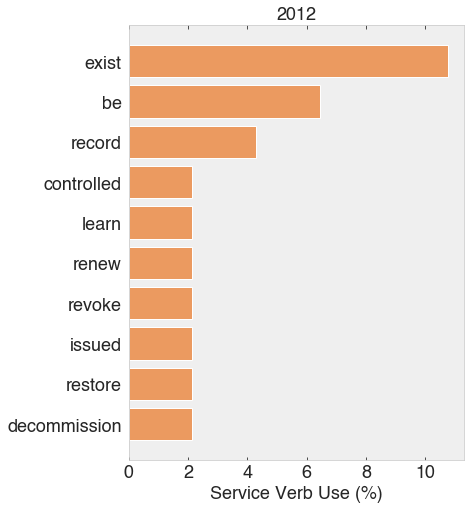

In [101]:
# Define function to extract the first verb from a text
def extract_first_verb(text):
    words = word_tokenize(text)
    pos_tags = pos_tag(words)
    
    for word, pos in pos_tags:
        if pos.startswith('V'):
            return word
    
    return None
    
# Load data
transactions_data = pd.read_csv(
    '../data/processed/201204-201703-service-transactions-processed.csv'
)

# Function to lemmatize a verb
def lemmatize_verb(verb):
    # Define the part of speech (POS) for WordNet lemmatizer
    pos = wordnet.VERB if verb.endswith('e') else wordnet.VERB if 'ing' in verb else wordnet.NOUN
    
    # Lemmatize the verb
    return lemmatizer.lemmatize(verb, pos)

# Extract the first word from each string
verbs_2012_df = transactions_data.loc[(transactions_data['201212'] > 0)]
first_words = verbs_2012_df['Service'].str.split().str[0]

# Convert the result to a list
first_words_list = first_words.tolist()

# Check if 'punkt' and 'averaged_perceptron_tagger' are downloaded; if not, download them
try:
    nltk.data.find('tokenizers/punkt')
    nltk.data.find('taggers/averaged_perceptron_tagger')
    nltk.download('wordnet')
    nltk.download('omw-1.4')
except LookupError:
    nltk.download('punkt')
    nltk.download('averaged_perceptron_tagger')
    nltk.download('wordnet')
    nltk.download('omw-1.4')

# Apply the exatract_first_verb function to create the 'verb' column
verbs_2012_df['verb'] = verbs_2012_df['Service'].apply(extract_first_verb)

# Format DataFrame
verbs_2012_df = pd.DataFrame.from_dict(verbs_2012_df.verb.value_counts()).reset_index()
verbs_2012_df.rename(columns={'index': 'verb', 'verb': 'freq'}, inplace=True)
verbs_2012_df['verb'] = verbs_2012_df['verb'].str.lower()

# Add percentage for each verb
verbs_2012_df['perc'] = (verbs_2012_df['freq'] / verbs_2012_df['freq'].sum()) * 100

# Initialize the WordNet lemmatizer
lemmatizer = WordNetLemmatizer()

# Apply lemmatization to the 'verb' column to get root form of verbs
verbs_2012_df['verb'] = verbs_2012_df['verb'].apply(lemmatize_verb)

# Set the font to Helvetica
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Helvetica']

# Create a new figure with a white background
fig, ax = plt.subplots(figsize=(6, 8))
fig.patch.set_facecolor('white')
ax.set_facecolor('#efefef')

# Plot the chart for the top 10 verbs
top_10_verbs = verbs_2012_df.head(10)
plt.barh(top_10_verbs['verb'], top_10_verbs['perc'], color='#eb9a60')

# Add title and labels
plt.xlabel('Service Verb Use (%)', fontsize=18)
plt.title('2012', fontsize=18)
plt.ylabel('')

# Format the plot
plt.gca().invert_yaxis()
ax.grid(False)  # Remove gridlines

# Set tick labels
ax.tick_params(
    axis='y',
    which='both',
    left=False,
    right=False,
    labelright=False
)

ax.tick_params(
    axis='x',
    which='minor',
    top=False,
    bottom=False,
    labelright=False
)

ax.tick_params(
    direction='in',
    axis='x',
    which='major',
    top=True,
    bottom=True,
    labelright=False
)

# Set axes labels and font size
ax.set_yticklabels(top_10_verbs['verb'], fontsize=18)
ax.set_xticklabels([0, 2, 4, 6, 8, 10], fontsize=18)

# Save figure
plt.savefig("../reports/figures/fig2e1.png", dpi=300, bbox_inches='tight')

# Show the plot
plt.show()

### Figure 2e2

/var/folders/5f/f4nt1g8x77ggbhbbvwpth89c0000gr/T/ipykernel_80278/3794189765.py:98: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(verbs_2022_df.verb, fontsize=16)


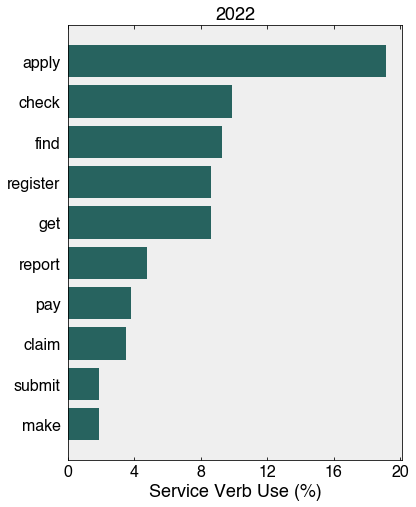

In [88]:
def load_and_process_data(file_path):
    """
    Load and process service verb data from an Excel file.

    Args:
        file_path (str): Path to the Excel file containing service verb data.

    Returns:
        pd.DataFrame: Processed DataFrame with verb frequencies and percentages.
    """
    # Load data from the Excel file
    services_data = pd.read_excel(file_path)

    # Get verb frequencies
    verbs = services_data['verb'].value_counts()

    # Create a DataFrame to store verb frequencies
    verbs_df = pd.DataFrame({'verb': verbs.index, 'freq': verbs.values})

    # List of verbs to exclude
    excluded_verbs = [
        'Apply', 'Check', 'Get', 'Register', 'Find', 'Report', 'Claim',
        'View', 'Pay', 'Submit', 'Manage', 'Book', 'Make', 'Create',
        'Appeal', 'Search', 'File', 'Use', 'Send', 'Sign', 'Ask', 'Explore',
        'Publish', 'Change', 'Prove', 'Plan', 'Look', 'Order', 'Tell', 'Help',
        'Fill', 'Support', 'Refer', 'Declare', 'Request', 'Complain', 'Accept',
        'Verify', 'Update', 'Cancel', 'Remove', 'Recruit', 'Calculate', 'Track',
        'Renew', 'Give', 'Record', 'Respond', 'Comply', 'Complete', 'Analyse',
        'Replace', 'Download', 'Repay', 'Add', 'Visit', 'Reply', 'Evict', 'Offer'
    ]

    # Filter out non-verbs
    verbs_df = verbs_df[~verbs_df["verb"].isin(excluded_verbs) == False]

    # Convert verbs to lowercase
    verbs_df['verb'] = verbs_df['verb'].str.lower()

    # Calculate verb frequencies as percentages
    verbs_df['perc'] = (verbs_df['freq'] / verbs_df['freq'].sum()) * 100

    return verbs_df

# Specify the file path for the Excel data
file_path = '../data/processed/202308-services-list.xlsx'

# Load and process the data
verbs_2022_df = load_and_process_data(file_path)

# Set the font to Helvetica
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Helvetica']

# Create a new figure with a white background
fig, ax = plt.subplots(figsize=(6, 8))
fig.patch.set_facecolor('white')
ax.set_facecolor('#efefef')

# Plot the chart
plt.barh(verbs_2022_df.iloc[:10, :].verb, verbs_2022_df.iloc[:10, :].perc, color='#27635f')

# Add title and labels
plt.title('2022', fontsize=18)
plt.xlabel('Service Verb Use (%)', fontsize=18)
plt.ylabel('')

# Format the plot
plt.gca().invert_yaxis()
ax.grid(False)  # Remove gridlines

# Set tick labels
ax.tick_params(
    axis='y',
    which='both',
    left=False,
    right=False,
    labelright=False
)

ax.tick_params(
    axis='x',
    which='minor',
    top=False,
    bottom=False,
    labelright=False
)

ax.tick_params(
    direction='in',
    axis='x',
    which='major',
    top=True,
    bottom=True,
    labelright=False
)

# Set axes labels and font size
plt.xticks(range(0, 21, 4), fontsize=16)
ax.set_yticklabels(verbs_2022_df.verb, fontsize=16)

plt.savefig("../reports/figures/fig2e2.png", dpi=300, bbox_inches='tight');